Auther: Zhenyu Yuan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**EDA:**

In [56]:
# Read data
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
dataset = pd.read_csv(url)
dataset.head()


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [57]:
# Number of rows
print(dataset.shape[0])
dataset.info()



65276
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_C

In [58]:
df = dataset.dropna(subset=['StripSearch']) # drop missing 
print(df['StripSearch'].value_counts())

0    57475
1     7801
Name: StripSearch, dtype: int64


In [5]:
!pip install chart-studio
from chart_studio import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 6.9 MB/s eta 0:00:00


In [59]:
# drop missing 
df = df.dropna(subset=['Perceived_Race'])
df = df.dropna(subset=['StripSearch'])
df = df.dropna(subset=['Age_group__at_arrest_'])
df = df.dropna(subset=['Sex'])
#df = df.dropna(subset=['Youth_at_arrest__under_18_years'])
df['Age_group__at_arrest_'].value_counts()
df.info()
#print(df['Youth_at_arrest__under_18_years'].unique())
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 17 years and younger'], 'Aged 17 years and under')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 65 and older'], 'Aged 65 years and older')
print(df['Age_group__at_arrest_'].unique())
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 17 years and under'], 0)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 18 to 24 years'], 1)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 25 to 34 years'], 2)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 35 to 44 years'], 3)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 45 to 54 years'], 4)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 55 to 64 years'], 5)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 65 years and older'], 6)
df = df.drop(df[df['Perceived_Race'] == 'Unknown or Legacy'].index)
df = df.drop(df[df['Sex'] == 'U'].index)
#df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].replace(['Youth (aged 17 and younger)'], 'Youth (aged 17 years and under)')
print(df['Age_group__at_arrest_'].unique())
print(df['Age_group__at_arrest_'].value_counts())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65248 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65248 non-null  int64  
 1   Arrest_Month                     65248 non-null  object 
 2   EventID                          65248 non-null  int64  
 3   ArrestID                         64780 non-null  float64
 4   PersonID                         65248 non-null  int64  
 5   Perceived_Race                   65248 non-null  object 
 6   Sex                              65248 non-null  object 
 7   Age_group__at_arrest_            65248 non-null  object 
 8   Youth_at_arrest__under_18_years  65248 non-null  object 
 9   ArrestLocDiv                     65248 non-null  object 
 10  StripSearch                      65248 non-null  int64  
 11  Booked                           65248 non-null  int64  
 12  Occurrence_Categor

In [60]:
new_df = df.drop(['Arrest_Year', 'Arrest_Month', 'Youth_at_arrest__under_18_years','EventID', 'ArrestID', 'PersonID', 'ArrestLocDiv', 'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'], axis=1)
#new_df.drop(columns = ['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID', 'ArrestLocDiv', 'Booked'])
new_df = new_df.dropna(subset=['Perceived_Race'])
group = new_df.groupby('Perceived_Race')
new_df.info()
list(group)
print(group.mean())
group.std()
#black_data = new_df.loc[new_df['Perceived_Race'] == 'Black']
#white_datat = new_df.loc[new_df['Perceived_Race'] == 'Whitte']
#black_data1 = black_data.loc[black_data['StripSearch'] == 0]
#black_data2 = black_data.loc[black_data['StripSearch'] == 1]
#black_data2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60187 entries, 0 to 65275
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Perceived_Race         60187 non-null  object
 1   Sex                    60187 non-null  object
 2   Age_group__at_arrest_  60187 non-null  int64 
 3   StripSearch            60187 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
                      Age_group__at_arrest_  StripSearch
Perceived_Race                                          
Black                              2.179587     0.138943
East/Southeast Asian               2.645739     0.077289
Indigenous                         2.616460     0.158385
Latino                             2.437465     0.074703
Middle-Eastern                     2.349089     0.070436
South Asian                        2.563244     0.071132
White                              2.844666     0.128699


,Age_group__at_arrest_,StripSearch
Perceived_Race,,
Black,1.245991,0.345897
East/Southeast Asian,1.427718,0.267080
Indigenous,1.087759,0.365196
Latino,1.238501,0.262986
Middle-Eastern,1.330391,0.255919
South Asian,1.351223,0.257081
White,1.319491,0.334873


In [61]:
group1 = new_df.groupby('Age_group__at_arrest_')
list(group1)
group1.mean()

,StripSearch
Age_group__at_arrest_,
0,0.091681
1,0.135577
2,0.132701
3,0.130781
4,0.101489
5,0.081893
6,0.027228


In [62]:
group1.std()

,StripSearch
Age_group__at_arrest_,
0,0.288627
1,0.342357
2,0.339260
3,0.337172
4,0.301993
5,0.274235
6,0.162814


In [63]:
group2 = new_df.groupby('Sex')
list(group2)
group2.mean()

,Age_group__at_arrest_,StripSearch
Sex,,
F,2.447098,0.101609
M,2.604165,0.125286


In [64]:
group2.std()

,Age_group__at_arrest_,StripSearch
Sex,,
F,1.308432,0.302147
M,1.335347,0.331046


In [65]:
group3 = new_df.groupby('Perceived_Race')
list(group3)
group3.mean()

,Age_group__at_arrest_,StripSearch
Perceived_Race,,
Black,2.179587,0.138943
East/Southeast Asian,2.645739,0.077289
Indigenous,2.616460,0.158385
Latino,2.437465,0.074703
Middle-Eastern,2.349089,0.070436
South Asian,2.563244,0.071132
White,2.844666,0.128699


<AxesSubplot:xlabel='Perceived_Race', ylabel='Count'>

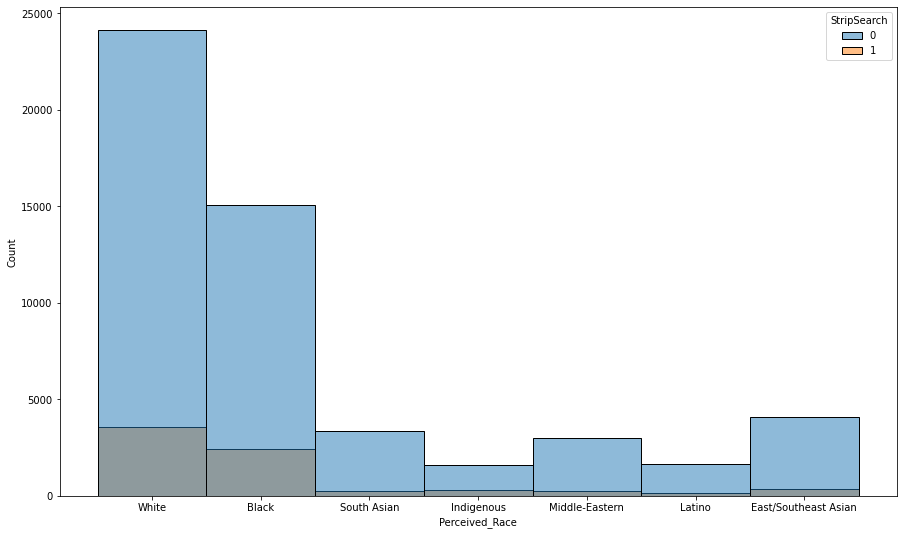

In [66]:
plt.figure(figsize=(15, 9))
sns.histplot(x="Perceived_Race", hue="StripSearch", data=new_df)

[Text(0.5, 1.0, 'Strip Search Rate vs Perceived Race and Sex')]

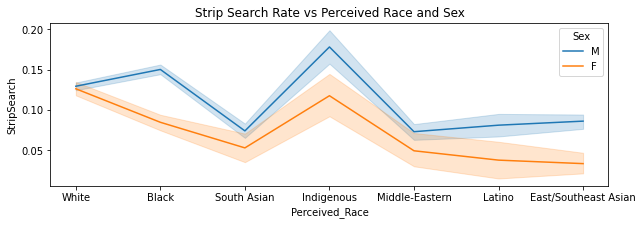

In [67]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=new_df, x="Perceived_Race", y="StripSearch", hue="Sex").set(title='Strip Search Rate vs Perceived Race and Sex')

[Text(0.5, 1.0, 'Strip Search Rate vs Perceived Race')]

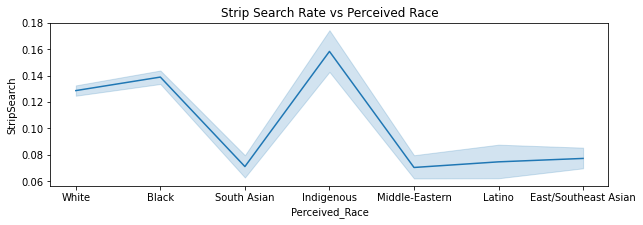

In [68]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=new_df, x="Perceived_Race", y="StripSearch").set(title='Strip Search Rate vs Perceived Race')

[Text(0.5, 1.0, 'Strip Search Rate vs Age Group at Arrest')]

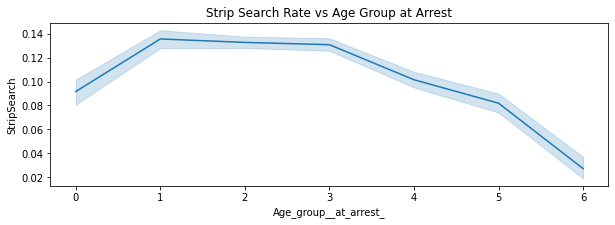

In [69]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=new_df, x="Age_group__at_arrest_", y="StripSearch").set(title='Strip Search Rate vs Age Group at Arrest')

[Text(0.5, 1.0, 'Strip Search Rate vs Sex')]

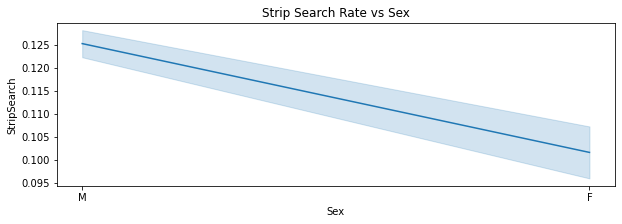

In [70]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=new_df, x="Sex", y="StripSearch").set(title='Strip Search Rate vs Sex')

[Text(0.5, 1.0, 'Perceived Race')]

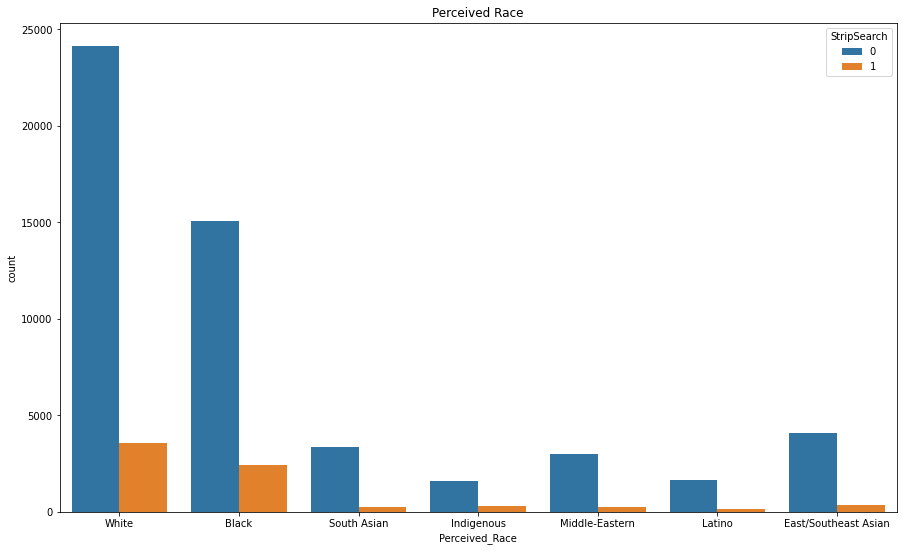

In [71]:
plt.figure(figsize=(15, 9))
sns.countplot(data=new_df, x="Perceived_Race", hue="StripSearch").set(title='Perceived Race')

<AxesSubplot:xlabel='Sex', ylabel='Count'>

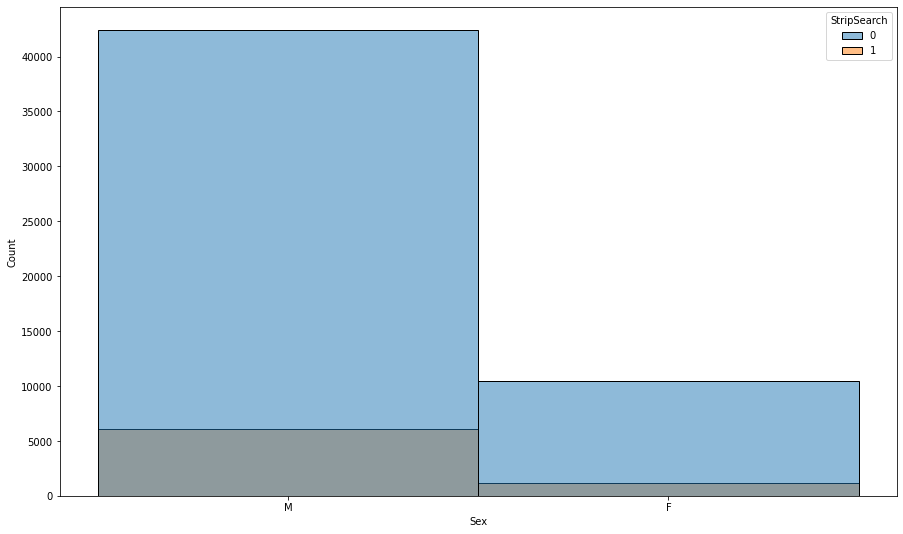

In [72]:
plt.figure(figsize=(15, 9))
sns.histplot(x="Sex", hue="StripSearch", data=new_df)


[Text(0.5, 1.0, 'Strip Search Rate vs Sex')]

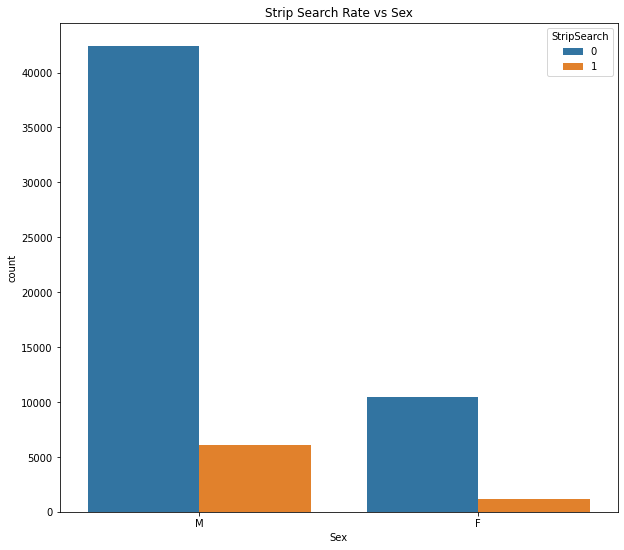

In [73]:
plt.figure(figsize=(10, 9))
sns.countplot(data=new_df, x="Sex", hue="StripSearch").set(title='Strip Search Rate vs Sex')

<AxesSubplot:xlabel='Age_group__at_arrest_', ylabel='Count'>

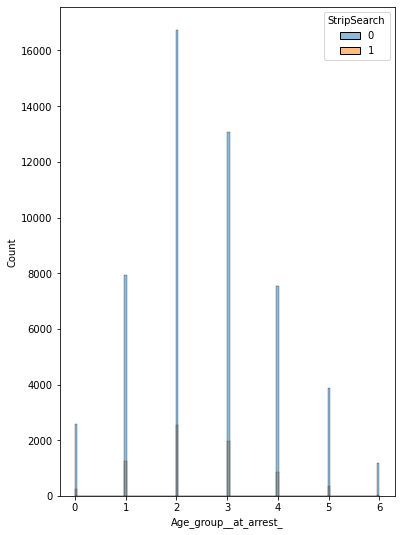

In [74]:
plt.figure(figsize=(6, 9))
sns.histplot(x="Age_group__at_arrest_", hue="StripSearch", data=new_df)


[Text(0.5, 1.0, 'Strip Search Rate vs Race and Age groups')]

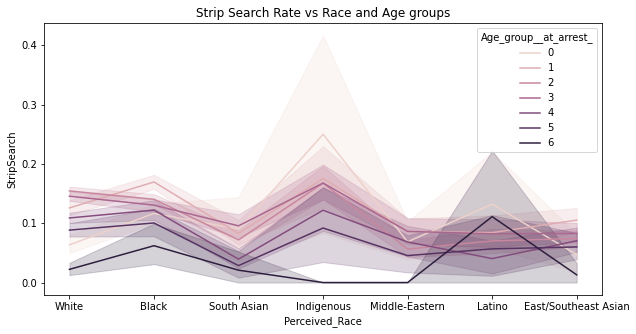

In [75]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=new_df, x="Perceived_Race", y="StripSearch", hue="Age_group__at_arrest_").set(title='Strip Search Rate vs Race and Age groups')

[Text(0.5, 1.0, 'Strip Search Rate vs Age groups at arrest')]

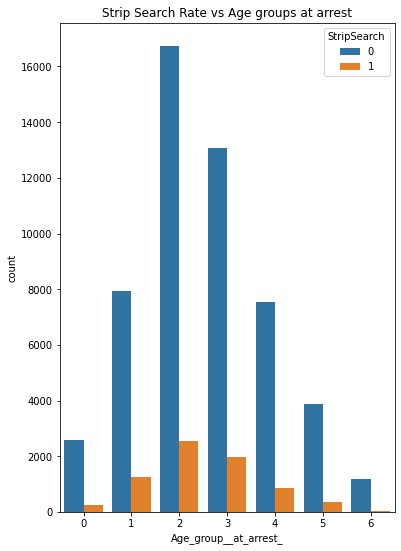

In [76]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="Age_group__at_arrest_", hue="StripSearch").set(title='Strip Search Rate vs Age groups at arrest')

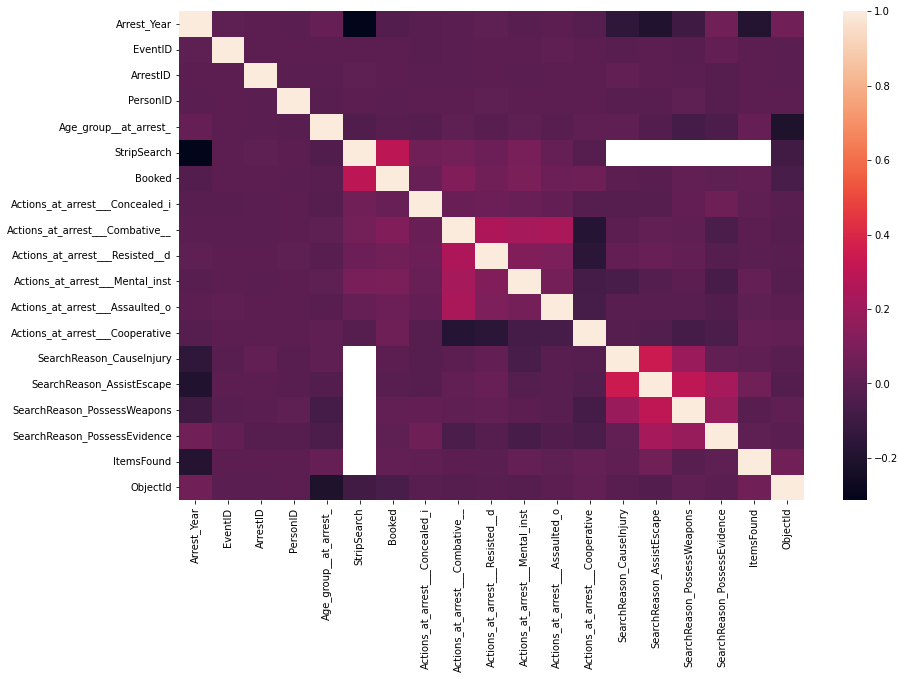

In [111]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr());

In [ ]:
#from statsmodels.graphics.factorplots import interaction_plot
#rq_2_interaction = interaction_plot(new_df['Age_group__at_arrest_'], new_df['Perceived_Race'], new_df['StripSearch'], colors=['red','blue'], markers=['D','^'], ms=10)

In [ ]:
#plt.figure(figsize=(15, 9))
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([17.0], "Younger than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([21.0], "Younger than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([29.5], "Younger than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([39.5], "Older than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([49.5], "Older than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([59.5], "Older than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([65.0], "Older than 30")
#sns.histplot(x="Age_group__at_arrest_", hue="StripSearch", data=df)

In [77]:
print(new_df['Perceived_Race'].unique())
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='Black']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest

print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

['White' 'Black' 'South Asian' 'Indigenous' 'Middle-Eastern' 'Latino'
 'East/Southeast Asian']
Ttest results for StripSearch: Ttest_indResult(statistic=-3.1059472505339207, pvalue=0.0018981642955491205)


In [78]:
import statsmodels.stats.api as sms
def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof
print('Mean StripSearch rates between white and black:',old_search.mean(), new_search.mean())
print('Standard deviation between white and black:',old_search.std(), new_search.std())

cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and black:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and black:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and black: 0.12869929262306914 0.13894280168969061
Standard deviation between white and black: 0.33487285930918165 0.3458967032997222
Confidence interval for StripSearch rates between white and black: (-0.01670774545880803, -0.003779272674434909)
DOF for StripSearch rates between white and black: 36357.06139056397


In [79]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='South Asian']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=12.179729220443274, pvalue=1.1084947033789661e-33)


In [80]:
print('Mean StripSearch rates between white and South Asian:',old_search.mean(), new_search.mean())
print('Standard deviation between white and South Asian:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and South Asian:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and South Asian:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and South Asian: 0.12869929262306914 0.07113202324937724
Standard deviation between white and South Asian: 0.33487285930918165 0.25708082571090984
Confidence interval for StripSearch rates between white and South Asian: (0.048301440030436744, 0.06683309871694706)
DOF for StripSearch rates between white and South Asian: 5352.963088277004


In [81]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='Middle-Eastern']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=11.824172938591785, pvalue=8.346736125907136e-32)


In [82]:
print('Mean StripSearch rates between white and Middle-Eastern:',old_search.mean(), new_search.mean())
print('Standard deviation between white and Middle-Eastern:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and Middle-Eastern:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and Middle-Eastern:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and Middle-Eastern: 0.12869929262306914 0.07043558850787766
Standard deviation between white and Middle-Eastern: 0.33487285930918165 0.2559192245842541
Confidence interval for StripSearch rates between white and Middle-Eastern: (0.048603445550317606, 0.06792396268006536)
DOF for StripSearch rates between white and Middle-Eastern: 4638.38485241048


In [83]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='Latino']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=8.216448311662525, pvalue=3.5784271283207235e-16)


In [84]:
print('Mean StripSearch rates between white and Latino:',old_search.mean(), new_search.mean())
print('Standard deviation between white and Latino:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and Latino:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and Latino:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and Latino: 0.12869929262306914 0.07470288624787776
Standard deviation between white and Latino: 0.33487285930918165 0.26298575184060174
Confidence interval for StripSearch rates between white and Latino: (0.04110876229805369, 0.06688405045232908)
DOF for StripSearch rates between white and Latino: 2148.631678812457


In [85]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='East/Southeast Asian']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=11.434385170531824, pvalue=5.272676177322486e-30)


In [86]:
print('Mean StripSearch rates between white and East/Southeast Asian:',old_search.mean(), new_search.mean())
print('Standard deviation between white and East/Southeast Asian:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and East/Southeast Asian:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and East/Southeast Asian:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and East/Southeast Asian: 0.12869929262306914 0.07728921124206709
Standard deviation between white and East/Southeast Asian: 0.33487285930918165 0.2670800567936467
Confidence interval for StripSearch rates between white and East/Southeast Asian: (0.04259633477798118, 0.06022382798402294)
DOF for StripSearch rates between white and East/Southeast Asian: 6827.677681050927


In [87]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='Indigenous']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=-3.4725958016162535, pvalue=0.0005255758167886268)


In [88]:
print('Mean StripSearch rates between white and Indigenous:',old_search.mean(), new_search.mean())
print('Standard deviation between white and Indigenous:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and Indigenous:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and Indigenous:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and Indigenous: 0.12869929262306914 0.15838509316770186
Standard deviation between white and Indigenous: 0.33487285930918165 0.3651962303121738
Confidence interval for StripSearch rates between white and Indigenous: (-0.04645010912005705, -0.012921491969208377)
DOF for StripSearch rates between white and Indigenous: 2163.542670439428


In [89]:
PR_old = new_df[new_df['Sex']=='M']
PR_new = new_df[new_df['Sex']=='F']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=7.459616295672534, pvalue=9.050157978978686e-14)


In [90]:
print('Mean StripSearch rates between Male and Female:',old_search.mean(), new_search.mean())
print('Standard deviation between Male and Female:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between Male and Female:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between Male and Female:', welch_dof(old_search, new_search))

Mean StripSearch rates between Male and Female: 0.12528605298422843 0.10160931347372025
Standard deviation between Male and Female: 0.3310463975064098 0.3021467784119301
Confidence interval for StripSearch rates between Male and Female: (0.017455439809029635, 0.029898039211986725)
DOF for StripSearch rates between Male and Female: 19028.67690338439


In [94]:
ttest_df = new_df.copy()
ttest_df['Age_group__at_arrest_'] = ttest_df['Age_group__at_arrest_'].replace([0], 'Younger than 34 yeaers old')
ttest_df['Age_group__at_arrest_'] = ttest_df['Age_group__at_arrest_'].replace([1], 'Younger than 34 yeaers old')
ttest_df['Age_group__at_arrest_'] = ttest_df['Age_group__at_arrest_'].replace([2], 'Younger than 34 yeaers old')
ttest_df['Age_group__at_arrest_'] = ttest_df['Age_group__at_arrest_'].replace([3], 'Older than 34 yeaers old')
ttest_df['Age_group__at_arrest_'] = ttest_df['Age_group__at_arrest_'].replace([4], 'Older than 34 yeaers old')
ttest_df['Age_group__at_arrest_'] = ttest_df['Age_group__at_arrest_'].replace([5], 'Older than 34 yeaers old')
ttest_df['Age_group__at_arrest_'] = ttest_df['Age_group__at_arrest_'].replace([6], 'Older than 34 yeaers old')

PR_old1 = ttest_df[ttest_df['Age_group__at_arrest_']=='Older than 34 yeaers old']
PR_new1 = ttest_df[ttest_df['Age_group__at_arrest_']=='Younger than 34 yeaers old']
old_search = PR_old1['StripSearch']
new_search = PR_new1['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant
print('Mean StripSearch rates between arrestees older and younger than 34 years old:',old_search.mean(), new_search.mean())
print('Standard deviation between arrestees older and younger than 34 years old:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between arrestees older and younger than 34 years old:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between arrestees older and younger than 34 years old:', welch_dof(old_search, new_search))
group2 = ttest_df.groupby('Age_group__at_arrest_')
group2.mean()

Ttest results for StripSearch: Ttest_indResult(statistic=-7.199313959345888, pvalue=6.122116770462994e-13)
Mean StripSearch rates between arrestees older and younger than 34 years old: 0.11076869806094183 0.12984316606509727
Standard deviation between arrestees older and younger than 34 years old: 0.313850926936497 0.3361361737589601
Confidence interval for StripSearch rates between arrestees older and younger than 34 years old: (-0.02426746590557247, -0.013881470102738405)
DOF for StripSearch rates between arrestees older and younger than 34 years old: 60176.20274234167


,StripSearch
Age_group__at_arrest_,
Older than 34 yeaers old,0.110769
Younger than 34 yeaers old,0.129843


In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [103]:
model = ols('StripSearch ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=new_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),41.599256,6.0,65.875129,5.526450e-82
C(Sex),7.421914,1.0,70.518499,4.657528e-17
C(Perceived_Race):C(Sex),7.354067,6.0,11.645644,4.418843e-13
Residual,6333.073078,60173.0,NaN,NaN


In [118]:
tukey_results = pairwise_tukeyhsd(new_df['StripSearch'], new_df['Sex'] + new_df['Perceived_Race'])
print(tukey_results)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
               FBlack FEast/Southeast Asian  -0.0512 0.0087 -0.0957 -0.0067   True
               FBlack           FIndigenous   0.0329 0.5385 -0.0148  0.0806  False
               FBlack               FLatino  -0.0469 0.5785 -0.1167   0.023  False
               FBlack       FMiddle-Eastern  -0.0353 0.7639 -0.0957  0.0251  False
               FBlack          FSouth Asian  -0.0317 0.7139 -0.0838  0.0204  False
               FBlack                FWhite   0.0415  0.001  0.0173  0.0657   True
               FBlack                MBlack   0.0654  0.001  0.0436  0.0872   True
               FBlack MEast/Southeast Asian   0.0014    0.9 -0.0253  0.0282  False
               FBlack           MIndigenous   0.0933  0.001  0.0572  0.1294   True
    

In [98]:
model = ols('StripSearch ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)', data=new_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),38.835453,6.0,61.700552,1.233072e-76
C(Age_group__at_arrest_),28.150854,6.0,44.725196,6.529425e-55
C(Perceived_Race):C(Age_group__at_arrest_),11.039273,36.0,2.923142,1.072262e-08
Residual,6308.658931,60138.0,NaN,NaN


In [101]:
print(new_df['Age_group__at_arrest_'].unique())

[3 2 4 5 1 6 0]


In [102]:

tukey_results1 = pairwise_tukeyhsd(new_df['StripSearch'], new_df['Age_group__at_arrest_'].astype('string') + new_df['Perceived_Race'])
print(tukey_results1)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
               0Black 0East/Southeast Asian  -0.0695 0.8514 -0.1747  0.0357  False
               0Black           0Indigenous   0.1334    0.9 -0.1323  0.3992  False
               0Black               0Latino   0.0158    0.9 -0.1447  0.1763  False
               0Black       0Middle-Eastern  -0.0479    0.9 -0.1451  0.0492  False
               0Black          0South Asian  -0.0265    0.9  -0.154  0.1011  False
               0Black                0White   -0.053 0.0856 -0.1081  0.0021  False
               0Black                1Black    0.053  0.001  0.0116  0.0945   True
               0Black 1East/Southeast Asian  -0.0112    0.9 -0.0686  0.0461  False
               0Black           1Indigenous   0.0591    0.9 -0.0345  0.1528  False
    

In [ ]:
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


#p_rounded = round_p_value(pvalue)
#significance = get_significance(pvalue)
#print(f'The p-value is {p_rounded} ({significance})')

In [ ]:
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
#tukey1 = pairwise_tukeyhsd(endog=new_df['StripSearch'],groups=new_df['Perceived_Race'],alpha=0.05)
#print(tukey1)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.0617  0.001 -0.0778 -0.0455   True
               Black           Indigenous   0.0194 0.1602 -0.0035  0.0424  False
               Black               Latino  -0.0642  0.001 -0.0881 -0.0403   True
               Black       Middle-Eastern  -0.0685  0.001 -0.0868 -0.0502   True
               Black          South Asian  -0.0678  0.001 -0.0853 -0.0503   True
               Black                White  -0.0102 0.0187 -0.0195  -0.001   True
East/Southeast Asian           Indigenous   0.0811  0.001   0.055  0.1072   True
East/Southeast Asian               Latino  -0.0026    0.9 -0.0295  0.0244  False
East/Southeast Asian       Middle-Eastern  -0.0069    0.9  -0.029  0.0153  False
East/Southeast Asian        

In [ ]:

#from scipy.stats import f_oneway

# One-way ANOVA
#sample_0 = drop_unknown_new_df[drop_unknown_new_df['Perceived_Race'] == 'Majority']['StripSearch']
#sample_1 = drop_unknown_new_df[drop_unknown_new_df['Perceived_Race'] == 'Minorities']['StripSearch']
#statistic, pvalue = f_oneway(sample_0, sample_1)

#print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 31.22437273182176, p = 2.308559741951696e-08


In [ ]:
#p_rounded = round_p_value(pvalue)
#significance = get_significance(pvalue)
#print(f'The p-value is {p_rounded} ({significance})')

The p-value is <0.001 (***)


In [ ]:
#tukey1 = pairwise_tukeyhsd(endog=drop_unknown_new_df['StripSearch'],groups=drop_unknown_new_df['Perceived_Race'],alpha=0.05)
#print(tukey1)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
Majority Minorities  -0.0149 0.001 -0.0202 -0.0097   True
---------------------------------------------------------


Text(0.5, 1.0, 'Interaction Plot to show mean strip search posibilities by perceived race and gender')

<Figure size 1080x648 with 0 Axes>

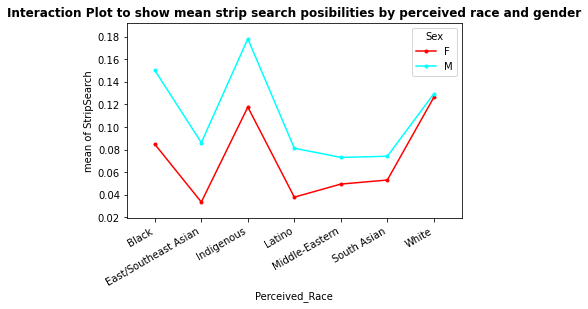

In [104]:
from statsmodels.graphics.factorplots import interaction_plot
#new_df['Age_group__at_arrest_'].sort.unique()
plt.figure(figsize=(15, 9))
rq_1_interaction = interaction_plot(x = new_df['Perceived_Race'], trace = new_df['Sex'], response = new_df['StripSearch']).autofmt_xdate()
plt.title('Interaction Plot to show mean strip search posibilities by perceived race and gender', fontweight='bold')

Text(0.5, 1.0, 'Interaction Plot to show mean strip search posibilities by perceived race and age group at arrest')

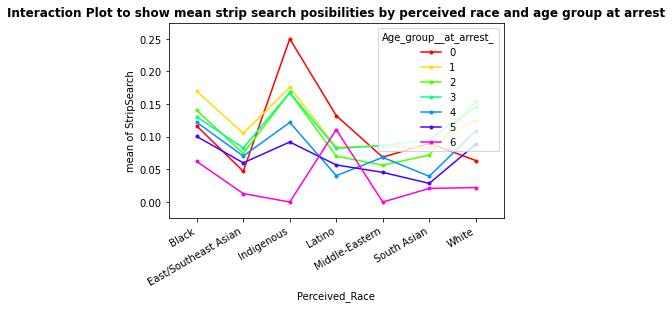

In [105]:

rq_2_interaction = interaction_plot(x = new_df['Perceived_Race'], trace = new_df['Age_group__at_arrest_'], response = new_df['StripSearch']).autofmt_xdate()
plt.title('Interaction Plot to show mean strip search posibilities by perceived race and age group at arrest', fontweight='bold')